<b>Rough Code - Ignore

In [7]:
# Install the following pip packages in the current Jupyter kernel which are required while running the code.
import os
# os.system('pip install re')
# os.system('pip install json')
# os.system('pip install time')

# os.system('pip install numpy')
# os.system('pip install string')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import numpy as np
from scipy import sparse
import pandas as pd
import string
import os


In [80]:
from os import system
import os

system("pip install Squarify")
os.system('pip install pandas')
os.system('pip install csv')
os.system('pip install sklearn')
os.system('pip install nltk')

0

In [150]:
import os
os.chdir('C:\\Users\\dee jay\\Downloads\\')
data = pd.read_csv('listings.csv')

### Merging Sentiment Score of Reviews

In [160]:
### Merging Sentiment Score of Reviews
sentiment_score= pd.read_csv("sentiment_Values_reviews_Seattle.csv")

sentiment_score=sentiment_score[["listing_id","compound"]]
data.drop_duplicates(['id'], keep='first', inplace=True)
data=data.groupby(['id'], as_index=False).median()
sentiment_score=sentiment_score.groupby("listing_id").describe()['compound']
sentiment_score['list_id']=sentiment_score.index
merged_data= data.merge(sentiment_score, left_on="id", right_on="list_id", how="inner")
merged_data.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,count,mean,std,min,25%,50%,75%,max,list_id
0,2318,2536,47.610819,-122.290816,296,7,21,0.17,1,343,21.0,0.924886,0.119358,0.4404,0.92400,0.96320,0.981600,0.9975,2318
1,4291,35749,47.687801,-122.313427,82,2,63,0.92,5,365,63.0,0.731565,0.436866,-0.8149,0.82200,0.91330,0.963400,0.9888,4291
2,5682,8993,47.523980,-122.359891,48,3,462,4.27,1,0,462.0,0.859691,0.207153,-0.8255,0.84835,0.93540,0.968775,0.9974,5682
3,6606,14942,47.654109,-122.337605,90,2,134,1.15,3,364,134.0,0.852816,0.227260,-0.5994,0.84490,0.92995,0.963625,0.9972,6606
4,9419,30559,47.550620,-122.320135,65,2,131,1.26,7,344,131.0,0.900527,0.153658,0.0000,0.90410,0.95790,0.983500,0.9992,9419


In [168]:
merged_data.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'count', 'mean',
       'std', 'min', '25%', '50%', '75%', 'max', 'list_id'],
      dtype='object')

In [169]:
merged_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7505 entries, 0 to 7504
Data columns (total 19 columns):
id                                7505 non-null int64
host_id                           7505 non-null int64
latitude                          7505 non-null float64
longitude                         7505 non-null float64
price                             7505 non-null int64
minimum_nights                    7505 non-null int64
number_of_reviews                 7505 non-null int64
reviews_per_month                 7505 non-null float64
calculated_host_listings_count    7505 non-null int64
availability_365                  7505 non-null int64
count                             7505 non-null float64
mean                              7505 non-null float64
std                               6990 non-null float64
min                               7505 non-null float64
25%                               7505 non-null float64
50%                               7505 non-null float64
75%        

In [171]:
merged_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,count,mean,std,min,25%,50%,75%,max,list_id
count,7.505000e+03,7.505000e+03,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,6990.000000,7505.000000,7505.000000,7505.000000,7505.000000,7505.000000,7.505000e+03
mean,1.682952e+07,4.780301e+07,47.626376,-122.333787,152.534977,3.145903,50.551765,2.246384,18.313924,133.182412,50.534977,0.102864,0.028251,-0.019105,0.101452,0.112203,0.116457,0.119612,1.682952e+07
std,8.560392e+06,5.584967e+07,0.046197,0.032112,150.992623,11.489040,67.485707,2.166196,53.414440,125.457283,67.466334,0.279100,0.083986,0.210415,0.277295,0.303534,0.314411,0.322785,8.560392e+06
min,2.318000e+03,2.000000e+01,47.496037,-122.419637,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.994100,0.000000,0.000000,0.000000,0.000000,2.318000e+03
25%,9.823172e+06,7.155362e+06,47.605391,-122.354906,79.000000,1.000000,7.000000,0.510000,1.000000,16.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.823172e+06
50%,1.827232e+07,2.520766e+07,47.622135,-122.331482,110.000000,2.000000,24.000000,1.540000,1.000000,89.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.827232e+07
75%,2.370221e+07,6.885075e+07,47.661541,-122.311506,175.000000,2.000000,68.000000,3.430000,4.000000,240.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.370221e+07
max,3.188036e+07,2.381447e+08,47.733955,-122.241349,3999.000000,400.000000,698.000000,14.470000,295.000000,365.000000,698.000000,0.994100,0.766155,0.994100,0.994100,0.994100,0.994100,0.999700,3.188036e+07


In [172]:
merged_data=merged_data[merged_data['price']<1000]

In [173]:
import seaborn as sns
# sns.boxplot(X['images'])
import matplotlib.pyplot as plt
# sns.JointGrid(X,X)

In [ ]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
#df = sns.load_dataset('iris')
 
# Density
sns.pairplot(merged_data, diag_kind="kde")
 
# Histogram
sns.pairplot(merged_data, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(merged_data, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )


In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# Data
x = merged_data['price']
y = merged_data['mean']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')
PR

In [ ]:
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) 
plt.figure(figsize=(13,6)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.violinplot(x='room_type', y='price', 
                   data=merged_data[(merged_data['room_type'].isin((merged_data['room_type'].value_counts()[:10].index.values))) &
                                  merged_data['room_type'] > 0 ])
g1.set_title('room_type distribution w.r.t. price', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('room_type', fontsize=16) # Xlabel
g1.set_ylabel('Price ', fontsize=16) #Ylabel

plt.show()

### Missing Values 

In [ ]:
cat_col=['id', 'name', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type',  'last_review'       ]
num_col=[]
for col in merged_data.columns:
    if col not in cat_col:
        num_col.append(col)

In [ ]:
for col in cat_col:
     merged_data[col].fillna(merged_data[col].mode()[0],inplace=True)

In [ ]:
for col in num_col:
     merged_data[col].fillna(merged_data[col].median(),inplace=True)

### Outliers Removal

In [ ]:
for col in num_col:
      data[col].fillna(data[col].mode()[0], inplace=True)
      data[col]=[float(i) for i in data[col]]
      mean, std=np.mean(data[col]),np.std(data[col])
      within=[mean-2*std,mean+2*std]
      ndata=data[data[col].isin(within)]

In [ ]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(data['number_of_reviews']))
print(z)
b=np.where(z > 2.5)
print(b)

In [ ]:
Q1 = data['number_of_reviews'].quantile(0.25)
Q3 = data['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
data[(data['number_of_reviews'] < (Q1 - 1.5 * IQR)) | (data['number_of_reviews'] > (Q3 + 1.5 * IQR))].head(10)

### Encoding Categorical variables

In [ ]:
cat_col=['neighbourhood_group','neighbourhood', 'room_type'   ]
# Label Encoding our target variable 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l=LabelEncoder() 


 
 

 

#One Hot Encoding of the Categorical features 
one_hot_neighbourhood_group=pd.get_dummies(data.neighbourhood_group) 
one_hot_neighbourhood=pd.get_dummies(data.neighbourhood) 
one_hot_room_type=pd.get_dummies(data.room_type) 


#removing categorical features 
data.drop(['neighbourhood_group','neighbourhood', 'room_type' ],axis=1,inplace=True) 

 

#Merging one hot encoded features with our dataset 'data' 
data=pd.concat([data,one_hot_neighbourhood_group,one_hot_neighbourhood,one_hot_room_type],axis=1) 

#removing dulpicate columns 
_, i = np.unique(data.columns, return_index=True) 
data=data.iloc[:, i] 

#Here our target variable is 'Income' with values as 1 or 0.  
#Separating our data into features dataset x and our target dataset y 


### Addressing multi- colinearity

In [35]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

x=data.drop(to_drop,axis=1) 

### Data Partioning 

In [38]:
x=data.drop(['id', 'name', 'host_name','last_review','price'],axis=1) 
y=data.price 

 

#Imputing missing values in our target variable 
y.fillna(y.mode()[0],inplace=True) 

#Now splitting our dataset into test and train 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

## Modeling, Feature Selection, Evaluation

### Linear Regression

In [56]:
#linear regression  ---------------
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

#making prediction 
y_ptrain = lm.predict(x_train)
y_pred = lm.predict(x_test)


  #linear regression metrics------
from sklearn import metrics
#print(lm.summary)
print('Linear Regression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Linear Regression Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Linear Regression Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('Linear Regression Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

Linear Regression Mean Absolute Error: 76.04733767037497
Linear Regression Mean Squared Error: 14986.470179510563
Linear Regression Root Mean Squared Error for train: 1.0419222737935618
Linear Regression Root Mean Squared Error for test: 0.7780505235953886


### Random Forest

In [46]:
#random forest ---------------

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train) 
y_ptrain=regressor.predict(x_train) 
y_pred = regressor.predict(x_test)  

#random forest metrics----------
from sklearn import metrics
print('Random Forest Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Random Forest Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Random Forest Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('Random Forest Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

Random Forest Mean Absolute Error: 60.018183609141055
Random Forest Mean Squared Error: 11967.754675925926
Random Forest Mean Squared Error for train set: 0.39360055448575987
Random Forest Mean Squared Error for test set: 0.6952875637289632


### XGBoost Regressor

In [54]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train) 
y_ptrain=regressor.predict(x_train) 
y_pred = regressor.predict(x_test)  

#random forest metrics----------
from sklearn import metrics
print('XGBRegressor Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('XGBRegressor Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('XGBRegressor Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('XGBRegressor Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor Mean Absolute Error: 64.36976985766063
XGBRegressor Mean Squared Error: 12643.504161051509
XGBRegressor Mean Squared Error for train set: 0.9741105669696526
XGBRegressor Mean Squared Error for test set: 0.7146474531110173


### MLP Regressor

In [55]:
#Neural Network ---------------
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor()
MLP.fit(x_train,y_train)

#making prediction 
y_ptrain = MLP.predict(x_train)
y_pred = MLP.predict(x_test)


  #Neural Network metrics------
from sklearn import metrics

print('Neural Network Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Neural Network Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Neural Network Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('Neural Network Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

Neural Network Mean Absolute Error: 139.29171654381733
Neural Network Mean Squared Error: 37588.85507443829
Neural Network Root Mean Squared Error for train: 1.444718319606255
Neural Network Root Mean Squared Error for test: 1.2322183479130202


### Feature Selection

C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


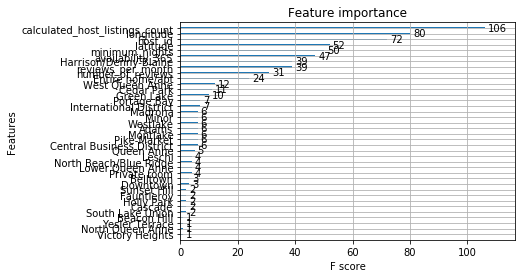

In [49]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBRegressor()
model.fit(x_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()


In [53]:
# select features using threshold
thresh=0.02
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train)
# train model
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train)
# train model
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_ptrain = selection.transform(x_train)
y_ptrain = selection_model.predict(select_X_ptrain)
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
print('XGBoost Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('XGBoost Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('XGBoost Root Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('XGBoost Root Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))


C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoost Mean Absolute Error: 63.98567827072925
XGBoost Mean Squared Error: 12122.269947207662
XGBoost Root Mean Squared Error for train set: 0.7446385376209097
XGBoost Root Mean Squared Error for test set: 0.699761586032026
